# Visualizing Earnings Based on College Majors

## Introduction

In this guided project, we'll explore how using the pandas plotting functionality along with the Jupyter notebook interface allows us to explore data quickly using visualizations.

There are many methods in pandas for quickly generating common plots from data in DataFrames. Like pyplot, the plotting functionality in pandas is a wrapper for matplotlib.

## Dataset facts

We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

 - `Rank` - Rank by median earnings (the dataset is ordered by this column).
 - `Major_code` - Major code.
 - `Major` - Major description.
 - `Major_category` - Category of major.
 - `Total` - Total number of people with major.
 - `Sample_size` - Sample size (unweighted) of full-time.
 - `Men` - Male graduates.
 - `Women` - Female graduates.
 - `ShareWomen` - Women as share of total.
 - `Employed` - Number employed.
 - `Median` - Median salary of full-time, year-round workers.
 - `Low_wage_jobs` - Number in low-wage service jobs.
 - `Full_time` - Number employed 35 hours or more.
 - `Part_time` - Number employed less than 35 hours.

### Using visualizations, we can start to explore questions from the dataset like:

 - Do students in more popular majors make more money?
   - Using scatter plots
 - How many majors are predominantly male? Predominantly female?
   - Using histograms
 - Which category of majors have the most students?
   - Using bar plots
 
We'll explore how to do these and more while primarily working in pandas. Before we start creating data visualizations, let's import the libraries we need and remove rows containing null values.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# This will need to be done in the future so 
# get accustomed to using now
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# line below is only for Jupyter
%matplotlib inline


recent_grads = pd.read_csv('recent-grads.csv')
print(recent_grads.iloc[0])
print(recent_grads.head())
print(recent_grads.tail())
recent_grads = recent_grads.dropna()

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object
   Rank  Ma

## Scatter plots in pandas

Most of the plotting functionality in pandas is contained within the `DataFrame.plot()` method. When we call this method, we specify the data we want plotted as well as the type of plot. We use the `kind` parameter to specify the type of plot we want. We use `x` and `y` to specify the data we want on each axis.

### Generate scatter plots in separate jupyter notebook cells to explore the following relations:

 - `Sample_size` and `Median`
 - `Sample_size` and `Unemployment_rate`
 - `Full_time` and `Median`
 - `ShareWomen` and `Unemployment_rate`
 - `Men` and `Median`
 - `Women` and `Median`
 
### Use the plots to explore the following questions:

 - Do students in more popular majors make more money?
 - Do students that majored in subjects that were majority female make more money?
 - Is there any link between the number of full-time employees and median salary?

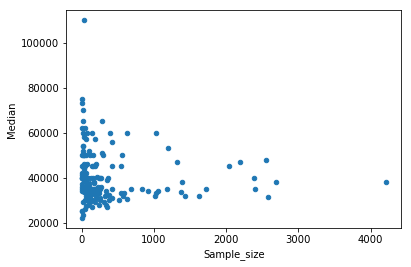

In [4]:
recent_grads.plot(x='Sample_size', y='Median', kind='scatter')

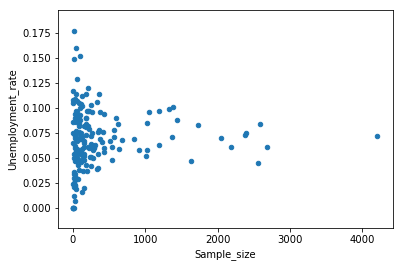

In [5]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')

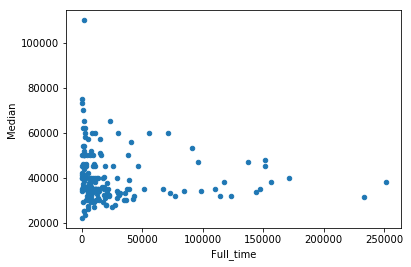

In [6]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter')

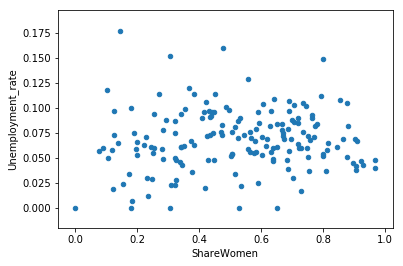

In [7]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')

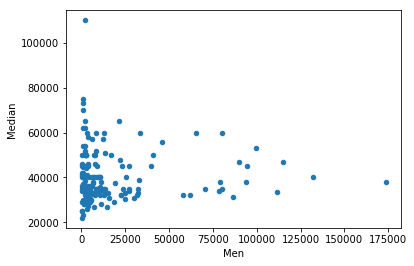

In [8]:
recent_grads.plot(x='Men', y='Median', kind='scatter')

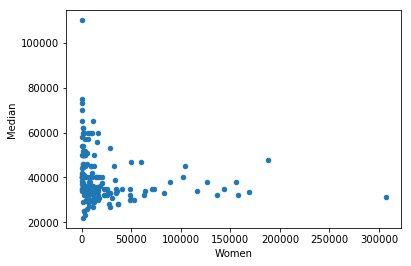

In [9]:
recent_grads.plot(x='Women', y='Median', kind='scatter')

### Findings:

#### Do students in more popular majors make more money?

    - Answer: sample size inc => the median doesn't seem to be larger
    

#### Do students that majored in subjects that were majority female make more money?

    - Answer: From the 'Unemployment_rate' vs. 'ShareWomen' plot, it looks like there 
    is no correlation between unemployment rate and the amount of women in the major.

#### Is there any link between the number of full-time employees and median salary?

    - Answer: As full time employees increase, higher salaries appear to decreasse 
    (based on the median salary and assuming the std is similar)

## Histograms in pandas

### Generate histograms in separate jupyter notebook cells to explore the distributions of the following columns:

 - `Sample_size`
 - `Median`
 - `Employed`
 - `Full_time`
 - `ShareWomen`
 - `Unemployment_rate`
 - `Men`
 - `Women`
 
#### We'll use the plots to explore the following questions:

 - What percent of majors are predominantly male? Predominantly female?
 - What's the most common median salary range?

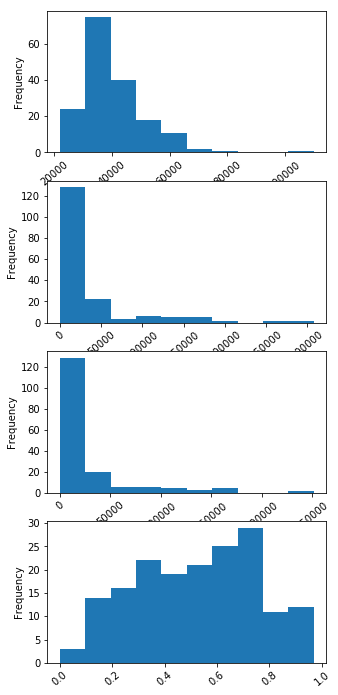

In [10]:
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(5,12))
for r in range(1,5):
    ax = fig.add_subplot(4,1,r)
    ax = recent_grads[cols[r]].plot(kind='hist', rot=40)

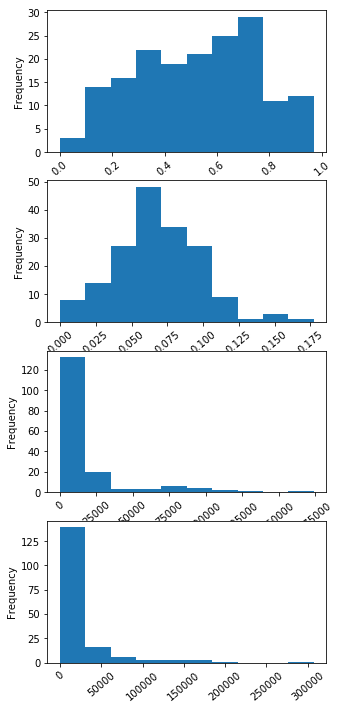

In [11]:

cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(5,12))
for r in range(4,8):
    ax = fig.add_subplot(4,1,r-3)
    ax = recent_grads[cols[r]].plot(kind='hist', rot=40)

### Findings

We're not able to see much correlation from these histograms. We do see a distribution of unemployment rates for various majors. If unemployment rate is not related to major, then we should see a wide plateau on the histogram.

## Scatter Matrix Plot

In the last 2 steps, we created individual scatter plots to visualize potential relationships between columns and histograms to visualize the distributions of individual columns. A scatter matrix plot combines both scatter plots and histograms into one grid of plots and allows us to explore potential relationships and distributions simultaneously. 

### Use Scatter Matrix to take another look at the data

 - Import scatter_matrix from the pandas.plotting module.
 - Create a 2 by 2 scatter matrix plot using the Sample_size and Median columns.
 - Create a 3 by 3 scatter matrix plot using the Sample_size, Median, and Unemployment_rate columns.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11649ed90>,
      dtype=object)

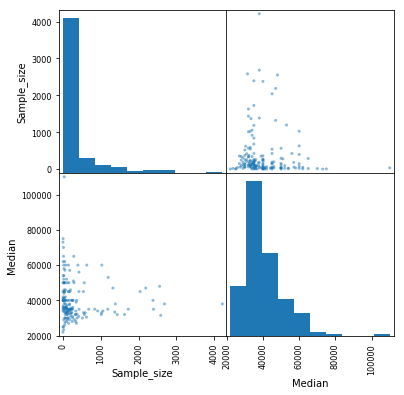

In [12]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(6,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116765490>,
      dtype=object)

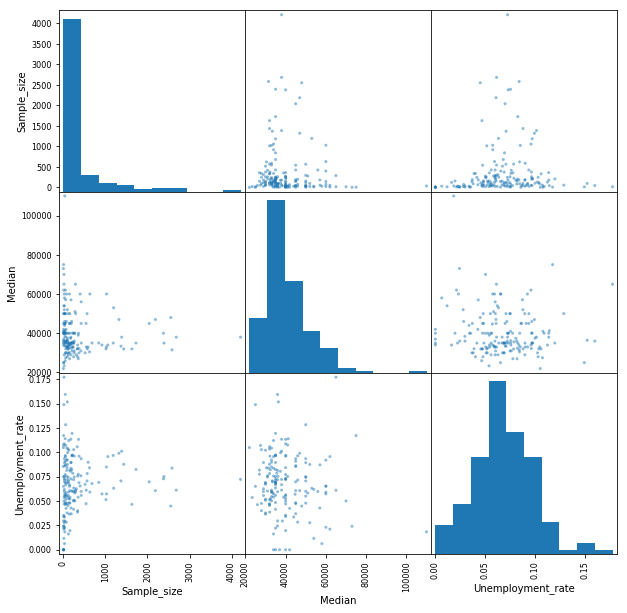

In [13]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10))

### Findings

Again, not so much correlations betwen these plots. 

 - There is a weak negative correlation between 'ShareWomen' and Median. 

 - Majors with less women tend to have higher earnings. 
   - It could be due to the fact that high paying majors like engineering tend to have less women.

The first ten rows in the data are mostly engineering majors, and the last ten rows are non engineering majors. 

We can generate a bar chart and look at the 'ShareWomen' vs 'Majors' to see if our hypothesis is correct.

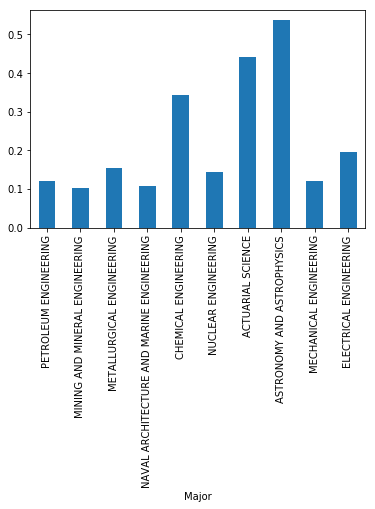

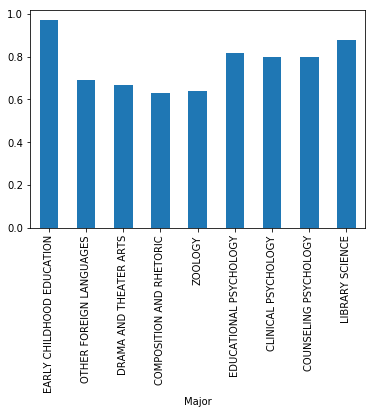

In [14]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen', legend=False)
recent_grads[163:].plot.bar(x='Major', y='ShareWomen', legend=False)

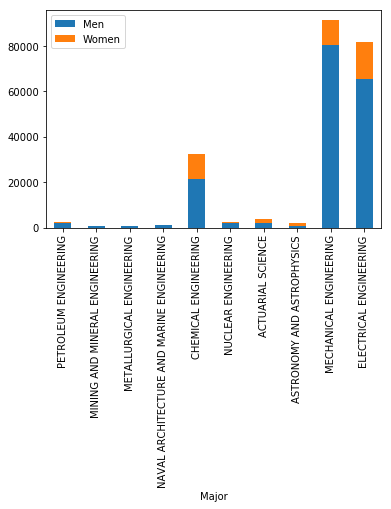

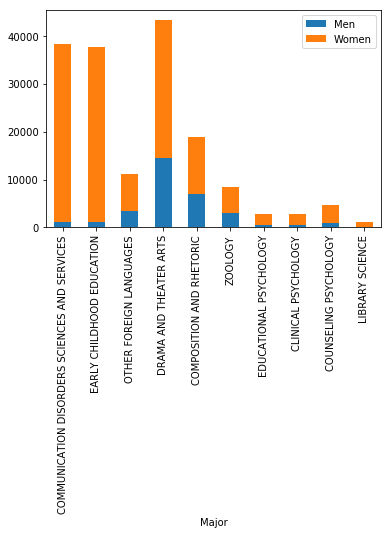

In [15]:

recent_grads[:10].plot.bar(x='Major', y=['Men','Women'], stacked=True)
recent_grads[recent_grads.shape[0]-10:].plot.bar(x='Major', y=['Men','Women'], stacked=True)

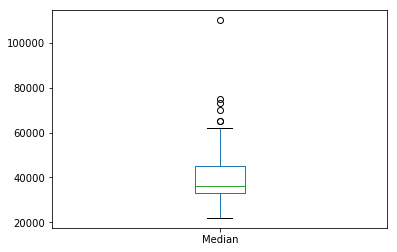

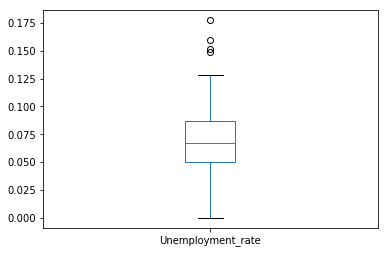

In [16]:
recent_grads.plot.box(y="Median")
recent_grads.plot.box(y="Unemployment_rate")

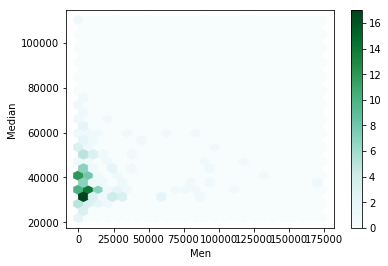

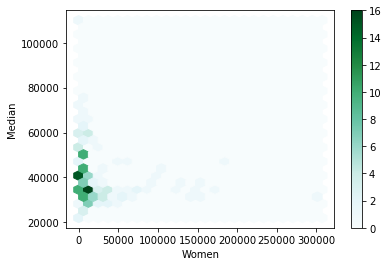

In [17]:

import numpy as np
recent_grads.plot.hexbin(x='Men', y='Median', gridsize=25, reduce_C_function=np.max)
recent_grads.plot.hexbin(x='Women', y='Median', gridsize=25, reduce_C_function=np.max)

### Findings

#### Majors with less women such as engineering tend to earn higher salaries.